# ***Anomaly Detection using Isolation Forest***

# **Section 1 - Establishing a Connection Between Google Drive and Google Colab**
*To streamline our workflow and seamlessly access project-related files, we'll establish a connection with Google Drive. This integration ensures a smooth collaboration between Google Drive and Google Colab, enabling efficient handling of relevant files throughout the project.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Section 2 - Useful Imports**
*This next code section includes the import of libraries and functions that will be useful during the process of performing the anomaly detection in the audio files*

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, confusion_matrix

# **Section 3 - Loading Embeddings**
*This code section loads pre-generated audio embeddings for training, validation, and testing.*

In [3]:
try:
    train_embeddings = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/train_embeddings.npy')
    val_embeddings = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/val_embeddings.npy')
    test_embeddings = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/test_embeddings.npy')
except FileNotFoundError:
    raise FileNotFoundError("Embeddings file not found. Please check the file paths.")

# **Section 4 - Splitting Embeddings**
*This code section splits the loaded embeddings into anomaly and normal embeddings.*


In [ ]:
# try:
    # anomaly_embeddings_train = train_embeddings[:224]  # First 224 elements are anomalies
    # normal_embeddings_train = train_embeddings[224:]   # Remaining elements are normal



#   # Split anomaly and normal embeddings
#   anomaly_embeddings_train = train_embeddings[:224]
#   anomaly_embeddings_train = np.delete(anomaly_embeddings_train, 154, axis=0)
#   anomaly_embeddings_train = np.delete(anomaly_embeddings_train, 166, axis=0)
#   anomaly_embeddings_train = np.delete(anomaly_embeddings_train, 198, axis=0)



#   normal_embeddings_train = train_embeddings[224:]   # Remaining elements are normal
#   normal_embeddings_train= np.vstack([normal_embeddings_train,train_embeddings[154]])
#   normal_embeddings_train= np.vstack([normal_embeddings_train,train_embeddings[166]])
#   normal_embeddings_train= np.vstack([normal_embeddings_train,train_embeddings[198]])
# except IndexError:
#     raise IndexError("Insufficient data for splitting. Please check the size of embeddings.")

# **Section 5 - Train Isolation Forest model**

*This code section defiens a function for isolation forest training*

In [4]:
def train_isolation_forest_model(embeddings):
    """
    Train the Isolation Forest model on normal data points.

    Parameters:
    normal_embeddings (numpy.ndarray): Array containing normal data points.

    Returns:
    sklearn.ensemble.IsolationForest: Trained Isolation Forest model.
    """
    # Initialize Isolation Forest model with a contamination rate
    isolation_forest_model = IsolationForest(contamination=0.15)  # Example: 10% contamination

    # Fit Isolation Forest model to normal data points
    isolation_forest_model.fit(embeddings)

    return isolation_forest_model

In [5]:
# Train Isolation Forest model on normal embeddings
isolation_forest_model = train_isolation_forest_model(train_embeddings)

In [6]:
from sklearn.ensemble import IsolationForest

# Assuming you have your validation data stored in X_val
anomaly_scores = isolation_forest_model.decision_function(val_embeddings)
print(anomaly_scores)
# You can then use these anomaly scores to evaluate the performance of the model

[ 0.01736617  0.01344781  0.0186403   0.01132855 -0.00115007 -0.02784912
 -0.05671146  0.00200228  0.00059906  0.00928834  0.03099971 -0.0306113
  0.04697343 -0.01349248 -0.00727022 -0.02219091 -0.00754361  0.04910404
  0.02883975  0.02984917  0.04160831  0.0368082   0.01314622  0.02760831
  0.01731038  0.00479537  0.03609734  0.03620268  0.03215577  0.031086
  0.02542435  0.04022897  0.02879394  0.0287168   0.03988064  0.02137941
  0.02717541  0.03217116  0.02259646  0.02516468  0.04902298  0.03302831
  0.02364434  0.03354274  0.04087881  0.04478731  0.03549222  0.04169173
  0.04565742  0.04990718  0.02691949  0.04113294  0.03029252  0.04088237
  0.03903015  0.0321052   0.01296323  0.04178754  0.02263146  0.03303287
  0.01849097  0.0380994   0.04161298  0.04743081 -0.02323155  0.00788136
 -0.01648056  0.04449497  0.04987222  0.03633496  0.04948784  0.02478986
  0.02141769  0.02619114  0.04752247  0.02218125  0.0270325   0.02042332
  0.03926312  0.03732841  0.03435105  0.03047871  0.03

# **Section 6 - Predict anomalies using Isolation Forest**

In [7]:
def predict_anomalies(isolation_forest_model, embeddings):
    """
    Predict anomalies using the trained Isolation Forest model.

    Parameters:
    isolation_forest_model (sklearn.ensemble.IsolationForest): Trained Isolation Forest model.
    embeddings (numpy.ndarray): Array containing data points to be predicted.

    Returns:
    numpy.ndarray: Predicted labels (1 for anomalies, -1 for normal data points).
    """
    # Predict anomalies using Isolation Forest model
    anomaly_predictions = isolation_forest_model.predict(embeddings)

    return anomaly_predictions

In [8]:
# Predict anomalies on validation and test embeddings
anomaly_predictions_val = predict_anomalies(isolation_forest_model, val_embeddings)

In [9]:
anomaly_predictions_test = predict_anomalies(isolation_forest_model, test_embeddings)

# **Section 6 - load the  validation label for evaluation process**

In [10]:
try:
    true_val_label = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/val_labels.npy')
    true_val_label[: 17] = -1
    true_val_label[17:] = 1
    true_val_label[12] = 1

    true_test_label = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/test_labels.npy')
    true_test_label[: 17] = -1
    true_test_label[17:] = 1
except FileNotFoundError:
    raise FileNotFoundError("Label file not found. Please check the file paths.")

print("true_val_label");
print(true_val_label);

print("anomaly_predictions_val");
print(anomaly_predictions_val);

indices_where_different = np.where(true_val_label != anomaly_predictions_val)[0]

print("Indices where arrays differ:", indices_where_different)
print(anomaly_predictions_val.shape)
print (indices_where_different.shape)

true_val_label
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
anomaly_predictions_val
[ 1  1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  

# **Section 7 - validation Evaluation Metrics**

get the confusion matrix and extract the TP, TN, FP, FN values for the validation set

True Positives (TP): 8
True Negatives (TN): 140
False Positives (FP): 4
False Negatives (FN): 8


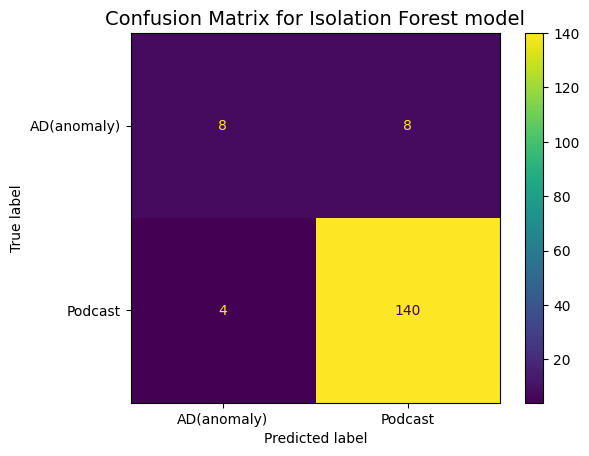

In [11]:
from sklearn.metrics import confusion_matrix  # Import confusion_matrix function explicitly
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
val_conf_matrix = confusion_matrix(true_val_label, anomaly_predictions_val)

# Extract TP, TN, FP, FN from confusion matrix
TP = val_conf_matrix[0, 0]  # Correctly predicted anomalies
TN = val_conf_matrix[1, 1]  # Correctly predicted normal instances
FP = val_conf_matrix[1, 0]  # Incorrectly predicted normal instances as anomalies
FN = val_conf_matrix[0, 1]  # Incorrectly predicted anomalies as normal instances

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=val_conf_matrix, display_labels=["AD(anomaly)", "Podcast"])
cm_display.plot()
plt.title('Confusion Matrix for Isolation Forest model', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(true_val_label, anomaly_predictions_val)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_val_label, anomaly_predictions_val)
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_val_label, anomaly_predictions_val)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(true_val_label, anomaly_predictions_val)
print("F1 Score:", f1)

# Calculate AUC score
fpr, tpr, _ = roc_curve(true_val_label, anomaly_predictions_val)
roc_auc = auc(fpr, tpr)


Accuracy: 0.925
Precision: 0.94
Recall: 0.9791666666666666
F1 Score: 0.9591836734693877


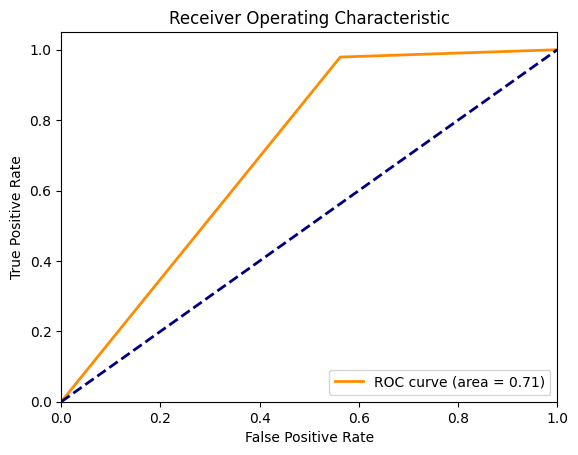

AUC Score: 0.7083333333333333


In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Display evaluation metrics
print("AUC Score:", roc_auc)

# **Section 9 - load the test labels for evaluation process**

In [12]:
try:
    true_test_label = np.load('/content/drive/MyDrive/AD-Blocker Project/embeddings/test_labels.npy')
    true_test_label[:17] = -1
    true_test_label[17:] = 1
except FileNotFoundError:
    raise FileNotFoundError("Label file not found. Please check the file paths.")

print("true_test_label");
print(true_test_label);



true_test_label
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


anomaly_predictions_test
[-1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1
  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1]
Indices where arrays differ: [  3   4   6   7  10  14  25  30  49  51  52  64  86  88 109 123 148 161
 166 170 175]
(186,)
(21,)
True Positives (TP) for Test: 11
True Negatives (TN) for Test: 154
False Positives (FP) for Test: 15
False Negatives (FN) for Test: 6






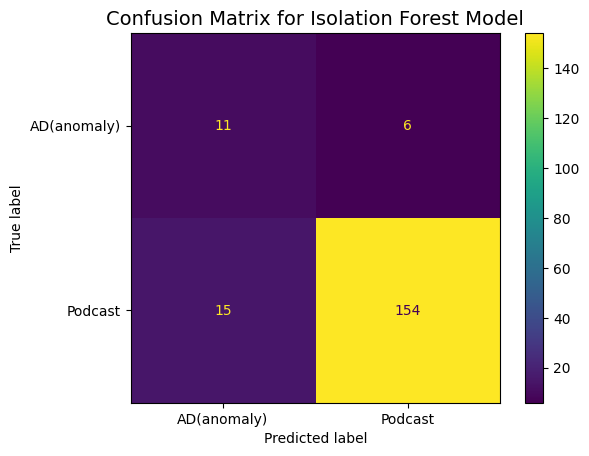





Accuracy for Test Set: 88.71%
Precision for Test Set: 96.25%
Recall for Test Set: 0.91%
F2 Score for Test Set (favored towards recall): 0.92%
F1 Score for Test Set: 0.94%






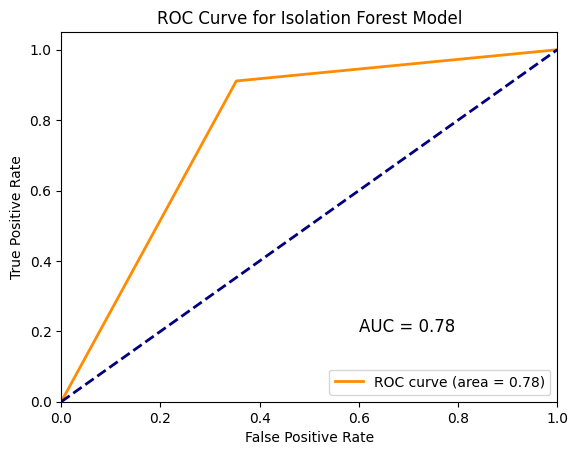





AUC Score for Test Set: 0.7791507135398538


In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score, fbeta_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Perform predictions on the test embeddings
anomaly_predictions_test = predict_anomalies(isolation_forest_model, test_embeddings)

print("anomaly_predictions_test");
print(anomaly_predictions_test);

indices_where_different = np.where(true_test_label != anomaly_predictions_test)[0]

print("Indices where arrays differ:", indices_where_different)
print(anomaly_predictions_test.shape)
print (indices_where_different.shape)

# Calculate confusion matrix for test set
test_conf_matrix = confusion_matrix(true_test_label, anomaly_predictions_test)

# Extract TP, TN, FP, FN from confusion matrix
TP_test = test_conf_matrix[0, 0]  # Correctly predicted anomalies
TN_test = test_conf_matrix[1, 1]  # Correctly predicted normal instances
FP_test = test_conf_matrix[1, 0]  # Incorrectly predicted normal instances as anomalies
FN_test = test_conf_matrix[0, 1]  # Incorrectly predicted anomalies as normal instances

print("True Positives (TP) for Test:", TP_test)
print("True Negatives (TN) for Test:", TN_test)
print("False Positives (FP) for Test:", FP_test)
print("False Negatives (FN) for Test:", FN_test)

print("\n\n\n")
# Display confusion matrix for test set
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=["AD(anomaly)", "Podcast"])
cm_display_test.plot()
plt.title('Confusion Matrix for Isolation Forest Model', fontsize = 14)
plt.show()

print("\n\n\n")
# Calculate accuracy for test set
accuracy_test = accuracy_score(true_test_label, anomaly_predictions_test)
accuracy_percentage = "{:.2f}%".format(accuracy_test * 100)

print("Accuracy for Test Set:", accuracy_percentage)

# Calculate precision for test set
precision_test = precision_score(true_test_label, anomaly_predictions_test)
precision_percentage = "{:.2f}%".format(precision_test * 100)
print("Precision for Test Set:", precision_percentage)

# Calculate recall for test set
recall_test = recall_score(true_test_label, anomaly_predictions_test)
recall_percentage = "{:.2f}%".format(recall_test)

print("Recall for Test Set:", recall_percentage)

# Calculate F1-score for test set
f1_test = f1_score(true_test_label, anomaly_predictions_test)
f1_percentage = "{:.2f}%".format(f1_test)

# Calculate F-beta score for test set (favored towards recall)
fbeta_test = fbeta_score(true_test_label, anomaly_predictions_test, beta=2)
fbeta_percentage = "{:.2f}%".format(fbeta_test)
print("F2 Score for Test Set (favored towards recall):", fbeta_percentage)

print("F1 Score for Test Set:", f1_percentage)

# Calculate AUC score for test set
fpr_test, tpr_test, _ = roc_curve(true_test_label, anomaly_predictions_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for test set
print("\n\n\n")

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc_test, fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Isolation Forest Model')
plt.legend(loc="lower right")
plt.show()
print("\n\n\n")

# Display AUC score for test set
print("AUC Score for Test Set:", roc_auc_test)

# non relenvat from here